In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
bb=pd.read_csv('forestfires.csv')
bb.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
bb.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [4]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
duplicate=bb[bb.duplicated()]
print("Duplicted Row:")

Duplicted Row:


In [6]:
bb.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
bb=bb.loc[:,['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category']]
bb

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
x=bb.iloc[:,0:-1]

In [9]:
y=bb.iloc[:,-1]

In [10]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [12]:
y.replace(to_replace=['small','large'],value=[0,1],inplace=True)

In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: int64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

# Creating model

In [15]:
import tensorflow as tf

In [16]:

model1=tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(15,input_dim=28,activation='sigmoid'))
model1.add(tf.keras.layers.Dense(10,activation='sigmoid'))
model1.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                435       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 606
Trainable params: 606
Non-trainable params: 0
_________________________________________________________________


In [18]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
history=model1.fit(x,y,validation_split=0.20,epochs=50,batch_size=100)

Epoch 1/50
5/5 [==============================] - 1s 37ms/step - loss: 0.7026 - accuracy: 0.3438 - val_loss: 0.6908 - val_accuracy: 0.6442
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 0.6886 - accuracy: 0.6199 - val_loss: 0.6810 - val_accuracy: 0.6923
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6756 - accuracy: 0.7215 - val_loss: 0.6721 - val_accuracy: 0.7019
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6647 - accuracy: 0.7385 - val_loss: 0.6640 - val_accuracy: 0.7019
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6543 - accuracy: 0.7385 - val_loss: 0.6566 - val_accuracy: 0.7019
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6454 - accuracy: 0.7385 - val_loss: 0.6497 - val_accuracy: 0.7019
Epoch 7/50
5/5 [==============================] - 0s 10ms/step - loss: 0.6370 - accuracy: 0.7385 - val_loss: 0.6439 - val_accuracy: 0.7019
Epoch 8/50
5/5 [================

In [20]:
model1.save_weights('mywt.kmw')

In [21]:
score=model1.evaluate(x,y)
print("%s: %.2f%%" % (model1.metrics_names[1],score[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.7311
accuracy: 73.11%


In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

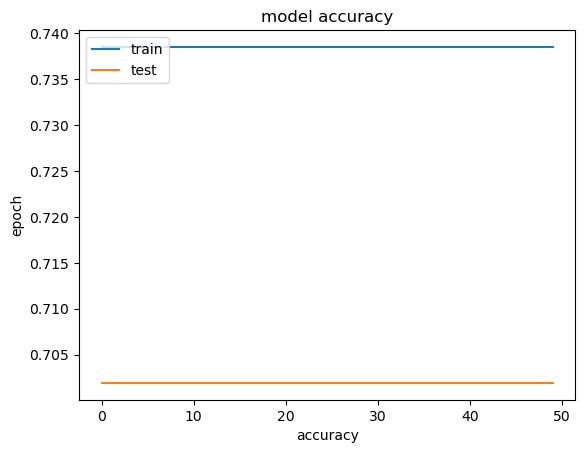

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

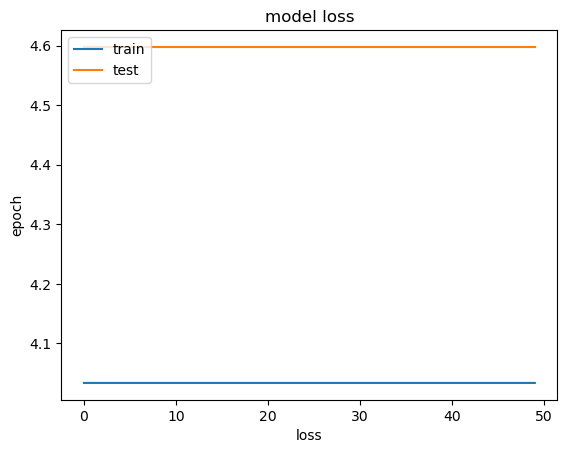

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [25]:
model2=tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(15,input_dim=28,activation='ReLU'))
model2.add(tf.keras.layers.Dense(10,activation='ReLU'))
model2.add(tf.keras.layers.Dense(1,activation='ReLU'))

In [26]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
history=model2.fit(x,y,validation_split=0.20,epochs=50,batch_size=100)

Epoch 1/50
5/5 [==============================] - 2s 95ms/step - loss: 4.0336 - accuracy: 0.7385 - val_loss: 4.5978 - val_accuracy: 0.7019
Epoch 2/50
5/5 [==============================] - 0s 16ms/step - loss: 4.0336 - accuracy: 0.7385 - val_loss: 4.5978 - val_accuracy: 0.7019
Epoch 3/50
5/5 [==============================] - 0s 17ms/step - loss: 4.0336 - accuracy: 0.7385 - val_loss: 4.5978 - val_accuracy: 0.7019
Epoch 4/50
5/5 [==============================] - 0s 18ms/step - loss: 4.0336 - accuracy: 0.7385 - val_loss: 4.5978 - val_accuracy: 0.7019
Epoch 5/50
5/5 [==============================] - 0s 17ms/step - loss: 4.0336 - accuracy: 0.7385 - val_loss: 4.5978 - val_accuracy: 0.7019
Epoch 6/50
5/5 [==============================] - 0s 18ms/step - loss: 4.0336 - accuracy: 0.7385 - val_loss: 4.5978 - val_accuracy: 0.7019
Epoch 7/50
5/5 [==============================] - 0s 18ms/step - loss: 4.0336 - accuracy: 0.7385 - val_loss: 4.5978 - val_accuracy: 0.7019
Epoch 8/50
5/5 [===========

In [28]:
scores=model2.evaluate(x,y)
print("%s: %.2f%%" % (model2.metrics_names[1],scores[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 4.1471 - accuracy: 0.7311
accuracy: 73.11%


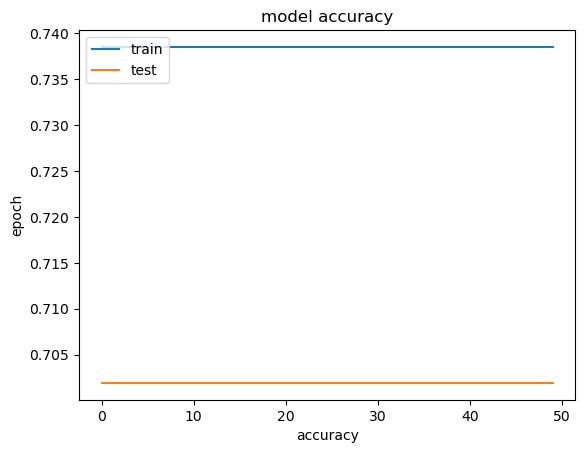

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

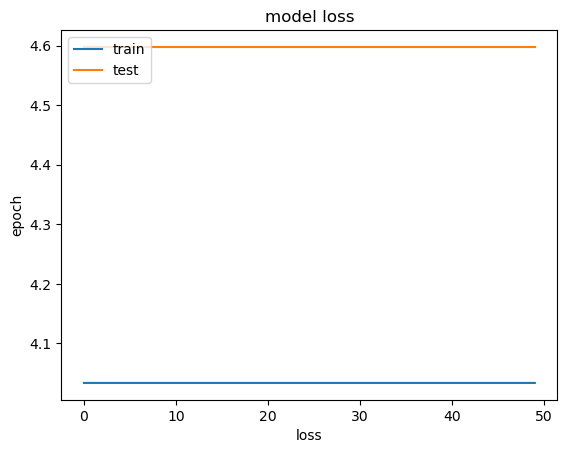

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()